**Import and Shape**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the file (already uploaded in Colab)
df = pd.read_csv('/content/deepq_ai_assignment1_data.csv')

print("Data Shape:", df.shape)
df.head()


Data Shape: (167020, 217)


,UID,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,1003904-3746,14 month lease,1103.0,2015-01-08,2016-02-28,2015-07-30,2015-01-08,2015-01-08,2015-07-30,2015-07-01,...,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.6625,0.600000
1,1003904-3751,12 month lease,1136.0,2015-01-24,2016-01-17,NaN,2003-09-11,2003-09-11,NaN,NaN,...,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.6625,0.142857
2,1003904-3756,12 month lease,1382.0,2015-02-20,2016-02-21,2016-02-21,2015-02-20,2015-02-20,NaN,NaN,...,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.303774,0.666667,1.6625,0.769231
3,1003904-3759,14 month lease,2417.0,2015-02-06,2016-04-03,2016-04-04,2015-02-06,2015-02-06,2016-04-04,2016-03-02,...,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.589636,1.000000,1.6625,0.750000
4,1003904-3766,12 month lease,1405.0,2015-01-10,2016-01-03,NaN,2014-01-10,2014-01-10,NaN,NaN,...,0.583333,3.000000,0.0,3.000000,1.000000,1.0,1.349664,1.000000,1.6625,0.700000


**Missing Values**

In [ ]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
X11,167020
X9,158340
X100,137026
X99,123888
X108,107416
X8,95579
X7,92761
X4,84400
X16,66919
X85,37511


**Target Distribution**

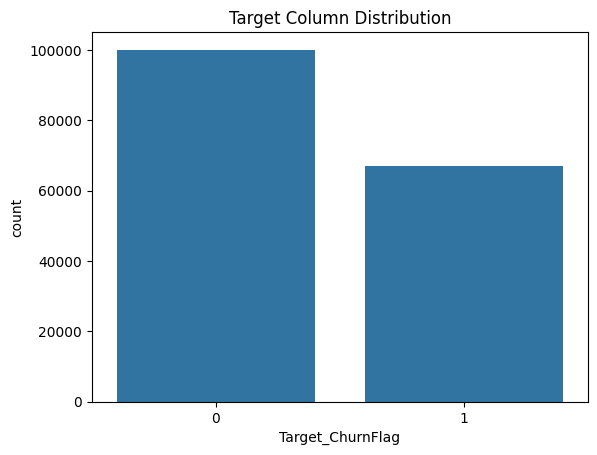

,proportion
Target_ChurnFlag,
0,0.599335
1,0.400665


In [ ]:
sns.countplot(data=df, x='Target_ChurnFlag')
plt.title("Target Column Distribution")
plt.show()

# Percent distribution
df['Target_ChurnFlag'].value_counts(normalize=True)


In [ ]:
df.describe().T

# Check for features with low unique values
low_uniques = df.nunique()
low_uniques[low_uniques < 10]


,0
X10,1
X11,0
X13,1
X14,1
X15,1
X17,5
X18,2
X22,2
X23,2
X24,2


**Correlation**

In [ ]:
#Only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

#Correlation with target
target_corr = numeric_df.corr()['Target_ChurnFlag'].sort_values(ascending=False)

print("Top Positively Correlated Features:\n", target_corr.head(10))
print("\nTop Negatively Correlated Features:\n", target_corr.tail(10))


Top Positively Correlated Features:
 Target_ChurnFlag    1.000000
X22                 0.095738
X85                 0.080301
X215                0.075263
X136                0.074805
X109                0.059290
X112                0.054671
X17                 0.050514
X1                  0.050354
X111                0.049781
Name: Target_ChurnFlag, dtype: float64

Top Negatively Correlated Features:
 X27    NaN
X32    NaN
X33    NaN
X45    NaN
X46    NaN
X48    NaN
X69    NaN
X72    NaN
X186   NaN
X189   NaN
Name: Target_ChurnFlag, dtype: float64


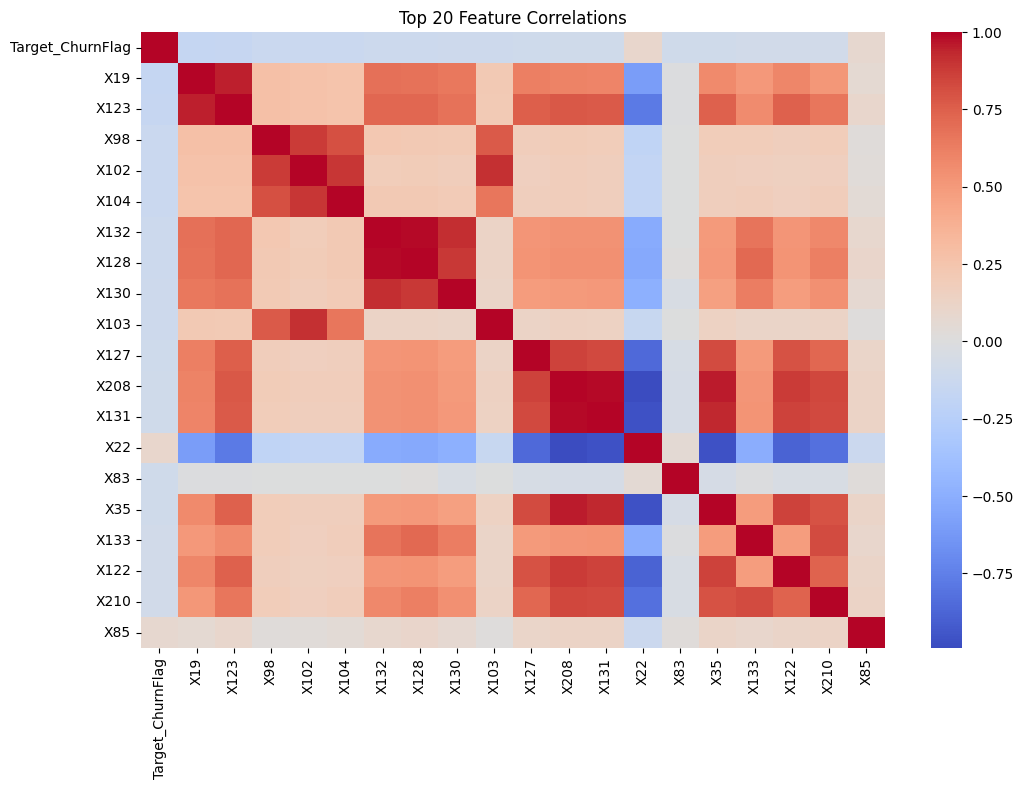

In [ ]:
top_corr_features = target_corr.abs().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_corr_features].corr(), annot=False, cmap='coolwarm')
plt.title("Top 20 Feature Correlations")
plt.show()

In [ ]:
low_variance = df.loc[:, df.nunique() <= 1]
print("Constant Features:", low_variance.columns.tolist())

Constant Features: ['X10', 'X11', 'X13', 'X14', 'X15', 'X25', 'X26', 'X27', 'X32', 'X33', 'X45', 'X46', 'X48', 'X69', 'X72', 'X149', 'X186', 'X189']


In [ ]:
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

Duplicate rows: 0


In [ ]:
# Top 10 numeric features
top_features = df.select_dtypes(include='number').drop('Target_ChurnFlag', axis=1).iloc[:, :10]

top_features.skew().sort_values(ascending=False)
top_features.kurt().sort_values(ascending=False)

,0
X1,27.905564
X19,7.772633
X12,5.595876
X17,0.447062
X13,0.000000
X15,0.000000
X14,0.000000
X21,-0.691026
X20,-0.771747
X11,NaN


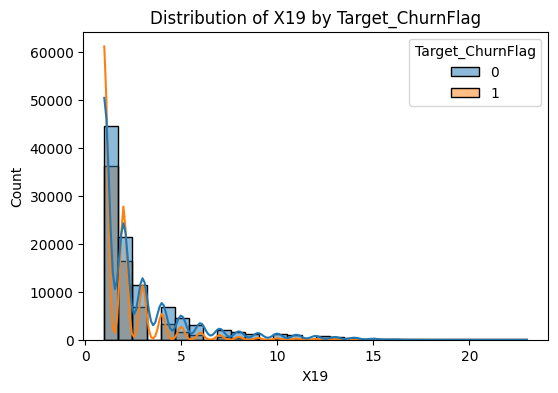

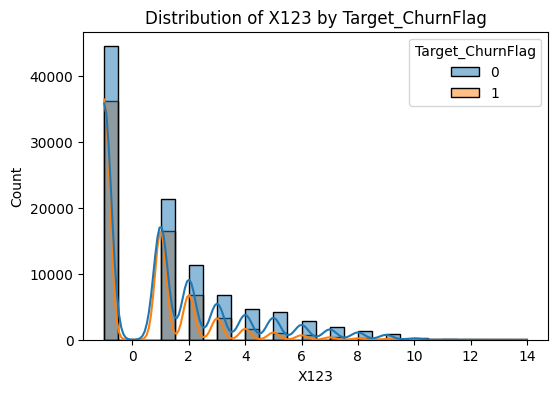

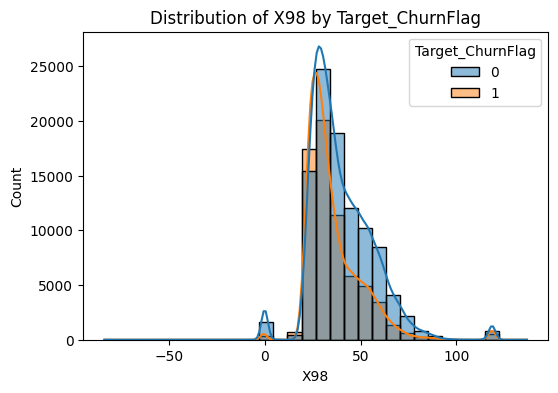

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Only taking numerical columns for correlation
numeric_df = df.select_dtypes(include='number')

#Correlation with Target
top_corr = numeric_df.corr()['Target_ChurnFlag'].abs().sort_values(ascending=False).drop('Target_ChurnFlag').head(3).index

# top 3 features distribution plot
for col in top_corr:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Target_ChurnFlag', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Target_ChurnFlag')
    plt.show()



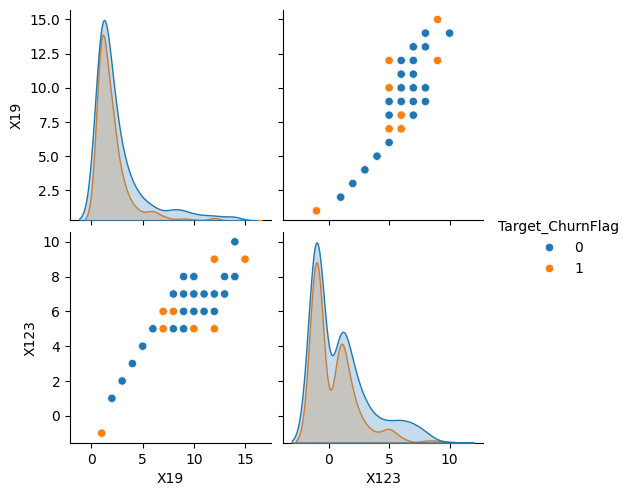

In [ ]:
sampled_df = df.sample(1000, random_state=42)
selected = ['Target_ChurnFlag'] + list(top_corr[:2])
sns.pairplot(sampled_df[selected], hue='Target_ChurnFlag')

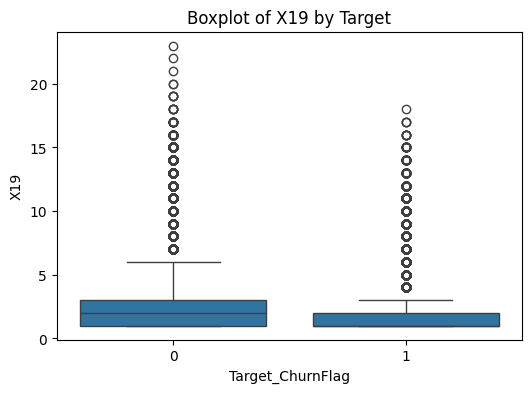

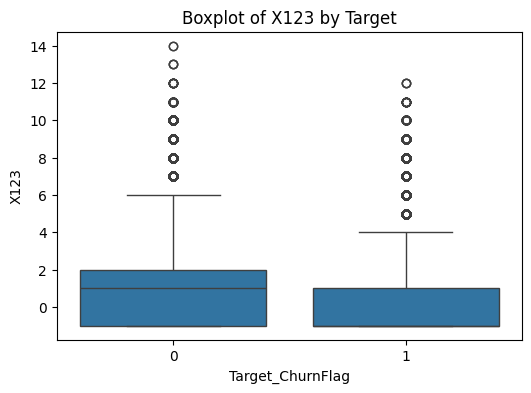

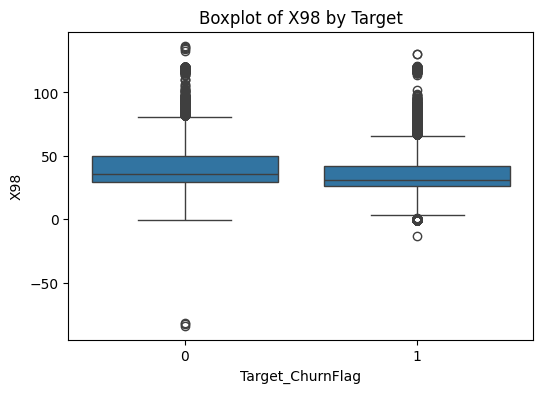

In [ ]:
for col in top_corr[:3]:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Target_ChurnFlag', y=col)
    plt.title(f'Boxplot of {col} by Target')
    plt.show()

**Model_Building**

(Train-Test Split)

In [ ]:
from sklearn.model_selection import train_test_split

# Drop UID & Target column to get features
X = df.drop(columns=['UID', 'Target_ChurnFlag'])
y = df['Target_ChurnFlag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


Non-Numerical_Data

In [ ]:
# Check which columns are not numeric
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())


Non-numeric columns: ['X0', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X16', 'X18', 'X30', 'X31', 'X99', 'X100', 'X108', 'X149', 'X150', 'X151', 'X152', 'X154', 'X155', 'X156', 'X157', 'X158', 'X164', 'X165', 'X169', 'X170']


**Label_Encoding**

In [ ]:
# Convert non-numeric columns to numeric using Label Encoding
for col in non_numeric_cols:
    X[col] = X[col].astype('category').cat.codes

In [ ]:
# Split after encoding
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

[[20020     0]
 [    1 13383]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20020
           1       1.00      1.00      1.00     13384

    accuracy                           1.00     33404
   macro avg       1.00      1.00      1.00     33404
weighted avg       1.00      1.00      1.00     33404

ROC-AUC Score: 0.999999998133964


In [ ]:
from sklearn.metrics import accuracy_score
train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_acc)

# Test accuracy already around 1.0


Training Accuracy: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())


Cross-Validation ROC-AUC Scores: [1.         1.         0.99999998 1.         1.        ]
Mean CV ROC-AUC: 0.9999999958947209


In [ ]:
y.value_counts(normalize=True)

,proportion
Target_ChurnFlag,
0,0.599335
1,0.400665


In [ ]:
#Missing values with column-wise median
X = X.fillna(X.median())

In [ ]:
print("Missing values per column:")
print(X.isnull().sum()[X.isnull().sum() > 0])

for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna(X[col].mode()[0])

print("Remaining NaNs:", X.isnull().sum().sum())


Missing values per column:
X11    167020
dtype: int64
Remaining NaNs: 167020


In [ ]:
X = X.drop(columns=['X11'])

In [ ]:
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna(X[col].mode()[0])

print("Remaining NaNs:", X.isnull().sum().sum())


Remaining NaNs: 0


In [ ]:
for col in X.select_dtypes(exclude='number').columns:
    X[col] = X[col].astype('category').cat.codes

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_log_pred = log_model.predict(X_test)
y_log_prob = log_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_log_pred))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_log_prob))


              precision    recall  f1-score   support

           0       0.60      0.44      0.51     20020
           1       0.40      0.56      0.47     13384

    accuracy                           0.49     33404
   macro avg       0.50      0.50      0.49     33404
weighted avg       0.52      0.49      0.49     33404

Logistic Regression ROC-AUC: 0.49991678039533693


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_rf_pred = rf_model.predict(X_test)
y_rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rf_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_rf_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_rf_prob))

import joblib

# Train karne ke baad:
joblib.dump(rf_model, 'random_forest_model.pkl')  # Save file



Confusion Matrix:
[[20020     0]
 [    1 13383]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20020
           1       1.00      1.00      1.00     13384

    accuracy                           1.00     33404
   macro avg       1.00      1.00      1.00     33404
weighted avg       1.00      1.00      1.00     33404

ROC-AUC Score: 0.9999999794736047


['random_forest_model.pkl']

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_xgb_pred = xgb_model.predict(X_test)
y_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost:")
print(classification_report(y_test, y_xgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_xgb_prob))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:14:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20020
           1       1.00      1.00      1.00     13384

    accuracy                           1.00     33404
   macro avg       1.00      1.00      1.00     33404
weighted avg       1.00      1.00      1.00     33404

ROC-AUC: 0.9999760177061432


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_gb_pred = gb_model.predict(X_test)
y_gb_prob = gb_model.predict_proba(X_test)[:, 1]

print("Gradient Boosting:")
print(classification_report(y_test, y_gb_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_gb_prob))


Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20020
           1       1.00      1.00      1.00     13384

    accuracy                           1.00     33404
   macro avg       1.00      1.00      1.00     33404
weighted avg       1.00      1.00      1.00     33404

ROC-AUC: 1.0


In [ ]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)

y_lgb_pred = lgb_model.predict(X_test)
y_lgb_prob = lgb_model.predict_proba(X_test)[:, 1]

print("LightGBM:")
print(classification_report(y_test, y_lgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_lgb_prob))


[LightGBM] [Info] Number of positive: 53535, number of negative: 80081
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.168373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19256
[LightGBM] [Info] Number of data points in the train set: 133616, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400663 -> initscore=-0.402703
[LightGBM] [Info] Start training from score -0.402703
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/tmp/ipython-input-74-2731971308.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')


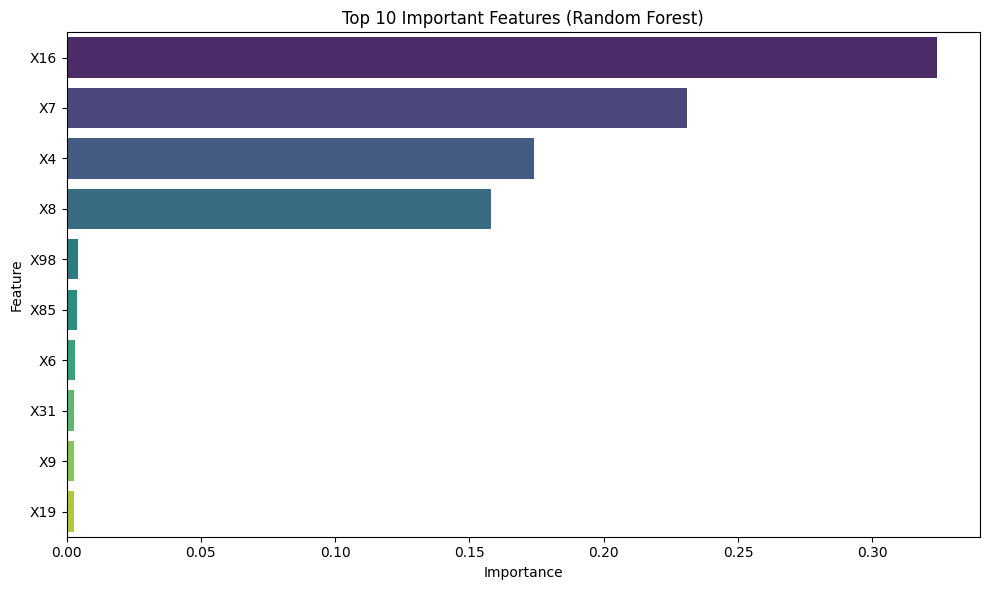

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


In [ ]:
selected_features = ["X16", "X7", "X4", "X19", "X123"]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
joblib.dump(model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [ ]:
feature_cols = df.drop(columns=["UID", "Target_ChurnFlag"]).columns
print("Total number of features:", len(feature_cols))


Total number of features: 215
